# Measuring Review Helpfulness: Correlation between Review Length and Rating Count

## Objective
Assess whether the detail in a review (measured by its word count) influences customer engagement, as reflected by the number of ratings a product receives.

## Steps Overview

### Step 1: Measure Review Length
- **Goal:** Calculate the number of words in each review.
- **Method:** Create a new column `review_length` by splitting the review text and counting the words.

### Step 2: Prepare Rating Count Data
- **Goal:** Ensure the `rating_count` column is numeric and clean.
- **Method:** Remove commas, convert strings to numbers, and fill missing values with 0.

### Step 3: Correlation Analysis
- **Goal:** Calculate the Pearson correlation coefficient between `review_length` and `rating_count`.
- **Interpretation:**  
  - A positive value indicates longer reviews are associated with higher rating counts.
  - A value near 0 suggests no linear relationship.
  - A negative value indicates an inverse relationship (less common).

### Step 4: Visualize the Relationship
- **Goal:** Use a scatter plot to visualize the relationship.
- **Method:** Plot `review_length` on the x-axis and `rating_count` on the y-axis.

The following code implements these steps.


Correlation between review length and rating count: 0.15


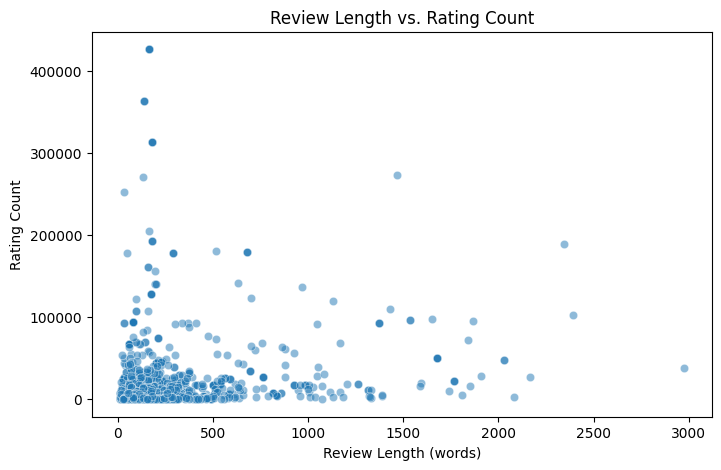

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset and measure review length
df = pd.read_csv('../data/amazon_sales.csv')
# Calculate review length by counting the number of words in each review_content
df['review_length'] = df['review_content'].apply(lambda x: len(str(x).split()))

# Step 2: Prepare rating_count data by cleaning and converting to numeric
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce')
df['rating_count'] = df['rating_count'].fillna(0)

# Step 3: Perform Correlation Analysis
correlation = df['review_length'].corr(df['rating_count'])
print(f"Correlation between review length and rating count: {correlation:.2f}")

# Step 4: Visualize the Relationship using a scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='review_length', y='rating_count', data=df, alpha=0.5)
plt.title('Review Length vs. Rating Count')
plt.xlabel('Review Length (words)')
plt.ylabel('Rating Count')
plt.show()


## Interpretation of the Correlation between Review Length and Rating Count

The Pearson correlation coefficient is **0.15**, which indicates a weak positive correlation. Here’s what this means:

- **Weak Positive Relationship:**  
  A correlation of 0.15 suggests that there is a slight tendency for longer reviews to be associated with a higher rating count. However, the strength of this relationship is modest.

- **Implications for Review Helpfulness:**  
  While detailed reviews might provide more valuable insights and help boost customer engagement, the weak correlation indicates that review length alone is not a strong predictor of how many ratings a product receives. Other factors such as review sentiment, product quality, or overall product popularity could have a more significant influence on the rating count.

- **Actionable Insights:**  
  - **Encouraging Detailed Reviews:**  
    Although the effect is small, encouraging customers to write more detailed reviews might slightly improve engagement and provide more useful feedback to potential buyers.
  - **Further Analysis:**  
    To better understand what drives customer engagement, consider analyzing additional factors—like sentiment analysis of the review content or direct helpfulness votes—alongside review length.

Overall, the data suggests that while there is a modest positive association between the length of a review and the rating count, review length should be evaluated as part of a broader strategy for improving review quality and customer engagement.
